In [3]:
# SUJET : Comparaison des vainqueurs d’élections avec différents modes de vote

# par une étude probabiliste à partir de simulations
# de situations de vote - deux méthodes seront proches si elles ont le même vainqueur. C’est cette
# dernière comparaison que nous aimerions mettre en œuvre à partir d’un protocole de simulations.

# à partir des résultats obtenus par simulation, proposer une classification des méthodes par rapport aux
# vainqueurs obtenus pour chaque élection.

# générer les participants et les votes =>

# loi binomiale, loi uniforme, loi Bêta

# Pondorset, méthode de Gaut


# EXEMPLES MÉTHODES VOTES : Scrutin majoritaire à un tour, à deux tours, scrutin proportionnel,
# vote par approbation, scrutin par élimination, vote préférentiel, jugement majoritaire

# les meilleurs méthodes de votes dépendent du contexte et de ce que l'on veut faire
# exemple pour élection un des meilleurs => vote par approbation (simple et efficace)

# Parmi les méthodes de vote par évaluation,
# on peut citer le vote par approbation, le jugement majoritaire ou le vote à la moyenne.

# donc comparer les méthodes de votes entre elles et regarder pour chacune le nombre et le degrès de satisfaction
# des votants


# LIENS UTILES : 
# https://www.lamsade.dauphine.fr/~mayag/Chapter_3_Aggregation_functions_Slides_V2.pdf
# https://github.com/simberaj/votelib
# https://pypi.org/project/condorcet/
# https://monlyceenumerique.fr/formations_python/python_2021/dl/lois_probabilites_simulation.html

# les cours de ce mec tout en  haut très utile (MASTER BDMA CentraleSupelec : Decision Modeling) :
# https://www.lamsade.dauphine.fr/~mayag/teaching.html


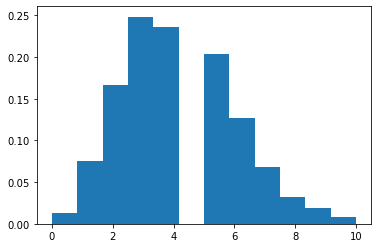

count :  [0.0132 0.0756 0.1668 0.2484 0.2364 0.     0.204  0.1272 0.0684 0.0324
 0.0192 0.0084]
bins :  [ 0.          0.83333333  1.66666667  2.5         3.33333333  4.16666667
  5.          5.83333333  6.66666667  7.5         8.33333333  9.16666667
 10.        ]
{'Zemmour': 1.32, 'Arthaud': 7.5600000000000005, 'Hidalgo': 16.68, 'Pouton': 24.839999999999996, 'Melanchon': 23.639999999999993, 'Lepen': 0.0, 'Jadot': 20.399999999999984, 'Lasalle': 12.720000000000004, 'Roussel': 6.840000000000002, 'Macron': 3.2399999999999975, 'DupontAignan': 1.9199999999999984, 'Pecresse': 0.8400000000000013}
119.99999999999997 

GAGNANT =  Pouton  avec  24.839999999999996  %


In [4]:
from math import *
from random import *
import matplotlib.pyplot as plt 
import numpy as np
import random

# Essayer pour 15aine, 20, 50, 100, 1000, 10 000 votants
# Essayer pour 3, 4, 5, 7, 10, 12 candidats

candidats = ["Macron","Lasalle","Pouton","DupontAignan","Zemmour","Pecresse","Jadot","Hidalgo","Melanchon","Lepen","Roussel","Arthaud"]
random.shuffle(candidats)

binomiale = np.random.binomial(50,1/len(candidats),1000)#une array de 1000 valeurs d'une loi binomiale de 50 tirages avec probabilité de succès (1/len(candidats).

counts, bins, bars = plt.hist(binomiale,bins=len(candidats),density=True)
plt.show()

print("count : ",counts)
print("bins : ",bins)

res = {}
cpt = 0
test = 0
for c in candidats:
    res[c] = counts[cpt]*100
    test += counts[cpt]*100
    cpt+=1
    #

print(res)
print(test,"\n")


for key,value in res.items():
    if value == max(res.values()):
        print("GAGNANT = ",key," avec ",value," %")

In [5]:
# $ pip install votelib
# https://github.com/simberaj/votelib

import votelib
from votelib.evaluate.sequential import TransferableVoteSelector
from votelib import *

votes = {
    ('Mary Robinson',): 612265,
    ('Brian Lenihan',): 694484,
    ('Austin Currie', 'Brian Lenihan'): 36789,
    ('Austin Currie', 'Mary Robinson'): 205565,
    ('Austin Currie',): 25548,
}
evaluator = TransferableVoteSelector(
    quota_function='droop',
    transferer='Hare'
)

result = evaluator.evaluate(votes)
print(result)

['Mary Robinson']


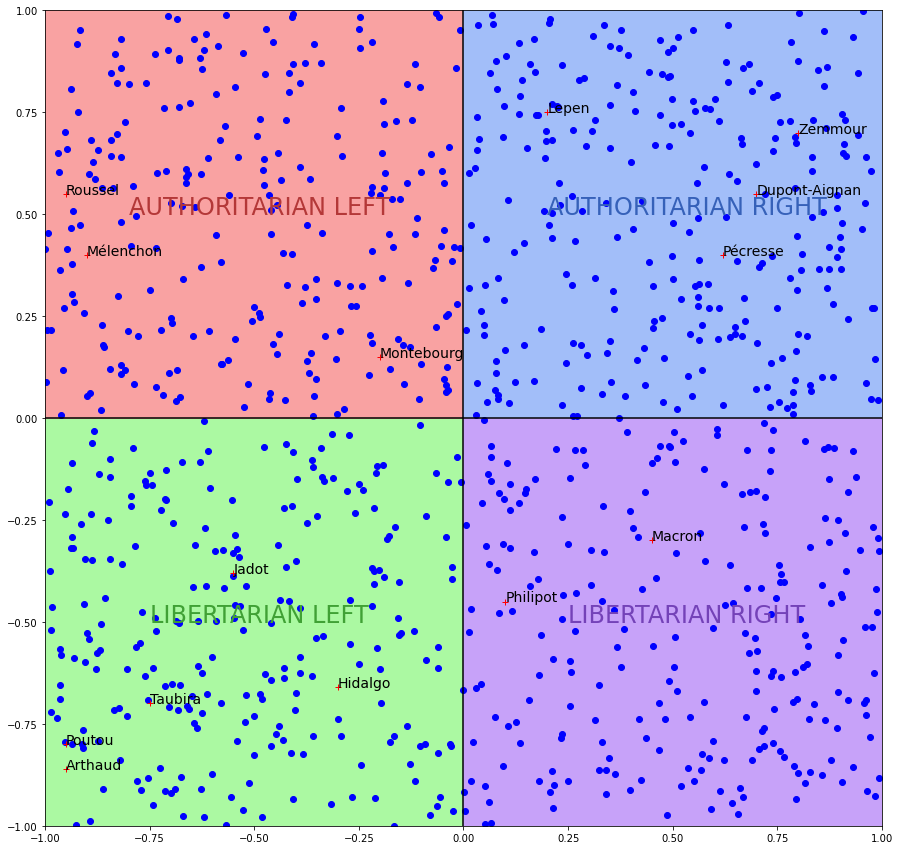

In [24]:
# faire un graphique comme le prof a fait et plot des points dans ce graphique => 
# avec la distance calculer les préférences de chacun

from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt

# on prends comme exemple un politic compass, et on admets que les votants vont voter a chaque fois pour 
# les candidats qui sont les plus proches de leurs idées politiques (donc de leurs position => distance euclidienne)

# SOURCES : https://www.reddit.com/r/PoliticalCompass/comments/rsdf7t/political_compass_of_the_candidates_of_the_2022/

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111)


#x = np.random.binomial(50, 0.5, 20000)
nombre_votants = 1000 # nb de votes

listeCoord = []

# Data for plotting
for i in range (0,nombre_votants):
    listeCoord.append([round(random.uniform(-1, 1.0),4),round(random.uniform(-1, 1.0),4)]) # entre -1 et 1, 4 chiffres après la virgule
    #random.standard_normalro
    
for coord in listeCoord:
    plt.plot(coord[0], coord[1], 'bo')
    
# labels
plt.text(-0.8, 0.5, "AUTHORITARIAN LEFT", fontsize=24,color='#b43838')
plt.text(0.2, 0.5, "AUTHORITARIAN RIGHT", fontsize=24,color='#3661b9')
plt.text(-0.75, -0.5, "LIBERTARIAN LEFT", fontsize=24,color='#40a135')
plt.text(0.25, -0.5, "LIBERTARIAN RIGHT", fontsize=24,color='#7442b8')

# candidats présidentielle 2022, avec leurs position dans le graphique comme dans la source:
dic = {"Zemmour":[0.8, 0.7],"Dupont-Aignan":[0.7, 0.55],"Pécresse":[0.62, 0.40],"Lepen":[0.2, 0.75],
       "Macron":[0.45, -0.3],"Philipot":[0.1, -0.45],"Montebourg": [-0.20,0.15],"Mélenchon":[-0.90,0.40],
       "Roussel":[-0.95,0.55],"Jadot":[-0.55,-0.38],"Hidalgo":[-0.3,-0.66],"Taubira":[-0.75,-0.7],
       "Poutou":[-0.95,-0.8],"Arthaud":[-0.95,-0.86]}

for name,coord in dic.items():
    plt.plot(coord[0],coord[1], 'r+')
    plt.text(coord[0],coord[1], name, fontsize=14,color='black')

# axes
plt.axhline(y = 0, color = 'black', linestyle = '-')
plt.vlines(x = 0, ymin=-1, ymax=1,color = 'black', linestyle = '-')

# couleurs rectangle
rect1 = Rectangle((0,0),-1,-1,color ='#abf9a2')
rect2 = Rectangle((0,0),-1,1,color ='#f9a2a2')
rect3 = Rectangle((0,0),1,1,color ='#a2bef9')
rect4 = Rectangle((0,0),1,-1,color ='#c7a2f9')
ax.add_patch(rect1)
ax.add_patch(rect2)
ax.add_patch(rect3)
ax.add_patch(rect4)

plt.xlim([-1,1])
plt.ylim([-1,1])

#faire les fleches
#arrowed_spines(fig, ax)

plt.show()


# Simuler l'opinion politiques des candidats et donc leurs préférences parmit les candidats
def distanceEuclidienne(coord1,coord2):
    x1,y1 = coord1
    x2,y2 = coord2
    return math.sqrt(pow(x2-x1,2)+pow(y2-y1,2))

In [ ]:
# LES DIFFÉRENTES MÉTHODES DE VOTES : 

# Scrutin majoritaire à un tour => FAIT
# Scrutin à deux tours => FAIT
# Scrutin proportionnel =>
# Vote par approbation => FAIT
# Scrutin par élimination
# Vote préférentiel
# Jugement majoritaire


#"Kenneth Arrow, prix Nobel d'économie, a démontré en 1951 que le scrutin parfait n'existait pas, 
#donc on essaye de trouver celui qui reflète le plus possible la préférence des électeurs", 
#conclut Herrade Igersheim. Tout en gardant à l'esprit qu'en la matière "la neutralité n'existe pas".

In [23]:
import math
import random

def approbation(): # OK
    resVotes = {}
    cptVotant = 0
    for coordV in listeCoord:
        #aller jusqu'a len(dic) n'est pas adapté (personne ne vote comme ça ou très peu)
        nombreApprobation = int(round(random.uniform(1,4),0)) # entre 1 et 4 approbation par votant
        #nombreApprobation = 3 # 3 approbations max par votant
        
        tmpDistance = {}
        for candidat,coordC in dic.items():
            tmpDistance[candidat] = distanceEuclidienne(coordV,coordC)
        
        lastDic = {}
        # Les approbations sont faites en fonction de la distance avec chaque candidat
        for appro in range(nombreApprobation):
            min_value = min(tmpDistance.values())
            nom = [k for k, v in tmpDistance.items() if v == min_value]
            tmpDistance.pop(nom[0])
            lastDic[nom[0]] = min_value
        
        resVotes[cptVotant] = lastDic
        cptVotant +=1
        
    # OK, ici on a nos votes, il faut calculer donc le vainqueur 
    # calculer celui qui a le plus de votes 
    res = {}
    for dico in resVotes.values():
        for k,v in dico.items():
            if res.get(k):
                res[k] += 1
            else:
                res[k] = 1
  
    ordre = dict(sorted(res.items(), key=lambda item: item[1],reverse=True))
    print(ordre)
    gagnant = list(ordre.keys())[0]
    print("\n Gagnant(s) du vote par approbation: ",gagnant)
    return gagnant
    
winnerApprobation = approbation()


# caluler le taux de satisfaction des électeurs pour le winner et si c'est le vainqueur de condorcet
# si c'est ni le vainqueurs de condorcet et qu'il n'as pas le meilleur de taux satisfaction la méthode n'est pas adaptée

{'Philipot': 274, 'Montebourg': 268, 'Pécresse': 254, 'Macron': 249, 'Lepen': 204, 'Jadot': 200, 'Hidalgo': 194, 'Mélenchon': 181, 'Dupont-Aignan': 177, 'Roussel': 161, 'Taubira': 126, 'Zemmour': 95, 'Poutou': 64, 'Arthaud': 36}

 Gagnant(s) du vote par approbation:  Philipot


In [18]:
def uninominal(nbTours = 1): # OK
    resVotes = {}
    cptVotant = 0
    for coordV in listeCoord:
        nbIteration = 1
        tmpDistance = {}
        for candidat,coordC in dic.items():
            tmpDistance[candidat] = distanceEuclidienne(coordV,coordC)
        lastDic = {}
        for appro in range(nbIteration):
            min_value = min(tmpDistance.values())
            nom = [k for k, v in tmpDistance.items() if v == min_value]
            tmpDistance.pop(nom[0])
            lastDic[nom[0]] = min_value
        
        resVotes[cptVotant] = lastDic
        cptVotant +=1
        
    # Résultats 1er tour :
    resultat1erTour = {}
    for dico in resVotes.values():
        for k,v in dico.items():
            if resultat1erTour.get(k):
                resultat1erTour[k] += 1
            else:
                resultat1erTour[k] = 1
                
    premierTour = dict(sorted(resultat1erTour.items(), key=lambda item: item[1],reverse=True))
    print("résultats 1er tour => \n",premierTour)
    
    if nbTours == 2:
        cptVotant = 0
        resVotes = {}
        for coordV in listeCoord:
            tmpDistance = {}
            # prendre les noms et coordonnées des 2 premiers :
            premier = dic.get(list(premierTour.keys())[0])
            deuxieme = dic.get(list(premierTour.keys())[1])
            deuxPremiers = {}
            deuxPremiers[list(premierTour.keys())[0]] = premier
            deuxPremiers[list(premierTour.keys())[1]] = deuxieme
            
            for candidat,coordC in deuxPremiers.items():
                tmpDistance[candidat] = distanceEuclidienne(coordV,coordC)
            
            lastDic = {}
            for k,v in tmpDistance.items():
                if v==min(tmpDistance.values()):
                    lastDic[k] = v
                    
            resVotes[cptVotant] = lastDic
            cptVotant +=1
        
        # Résultats 2nd tour :
        resultat2emeTour = {}
        for dico in resVotes.values():
            for k,v in dico.items():
                if resultat2emeTour.get(k):
                    resultat2emeTour[k] += 1
                else:
                    resultat2emeTour[k] = 1
        secondTour = dict(sorted(resultat2emeTour.items(), key=lambda item: item[1],reverse=True))
        print("\n résultats 2eme tour => \n",secondTour)
        gagnant = list(secondTour.keys())[0]
        nb_voix = round((list(secondTour.values())[0]/nombre_votants)*100,2)
        print("\n Gagnant du vote uninominal à 2 tours : ",gagnant, " avec ",nb_voix,"%")
        return gagnant
    
    else:
        gagnant = list(premierTour.keys())[0]
        nb_voix = round((list(premierTour.values())[0]/nombre_votants)*100,2)
        print("\n Gagnant du vote  uninominal à 1 tour: ",gagnant, " avec ",nb_voix,"%")
        return gagnant
    
winnerUninominal = uninominal(2)

résultats 1er tour => 
 {'Macron': 164, 'Lepen': 120, 'Montebourg': 113, 'Philipot': 106, 'Jadot': 86, 'Pécresse': 80, 'Mélenchon': 69, 'Roussel': 65, 'Hidalgo': 59, 'Zemmour': 45, 'Taubira': 44, 'Dupont-Aignan': 26, 'Poutou': 14, 'Arthaud': 9}

 résultats 2eme tour => 
 {'Macron': 561, 'Lepen': 439}

 Gagnant du vote uninominal à 2 tours :  Macron  avec  56.1 %


In [16]:
# Vote Préférentiel : 

# On a peut noter les candidats sur une échelle de 1 à len(candidats)
# ex 4 candidats : Macron, Lepen Mélenchon, Zemmour => res = [1: Macron,2: Lepen,3: Mélenchon,4: Zemmour]

def preferentiel():
    resVotes = {}
    cptVotant = 0
    for coordV in listeCoord:
        #aller jusqu'a len(dic) n'est pas adapté (personne ne vote comme ça ou très peu)
        #nombreApprobation = random.randint(0, len(dic))
        #nombreApprobation = int(round(random.uniform(0, len(dic)),0))
        nombreApprobation = 3 # 3 approbation max
        tmpDistance = {}
        for candidat,coordC in dic.items():
            tmpDistance[candidat] = distanceEuclidienne(coordV,coordC)
        
        lastDic = {}
        for appro in range(nombreApprobation):
            max_value = min(tmpDistance.values())
            nom = [k for k, v in tmpDistance.items() if v == max_value]
            tmpDistance.pop(nom[0])
            lastDic[nom[0]] = max_value
        
        resVotes[cptVotant] = lastDic
        cptVotant +=1
        
    # OK, ici on a nos votes, il faut calculer donc le vainqueur 
    # calculer celui qui a le plus de votes 
    res = {}
    for dico in resVotes.values():
        for k,v in dico.items():
            if res.get(k):
                res[k] += 1
            else:
                res[k] = 1
  
    ordre = dict(sorted(res.items(), key=lambda item: item[1],reverse=True))
    print(ordre)
    gagnant = list(ordre.keys())[0]
    print("\n Gagnant(s) du vote par approbation: ",gagnant)
    return gagnant
    
winnerApprobation = preferentiel()


# TEST CONDORCET ($ pip install condorcet)

candidates = ["Macron", "Lepen", "Lasalle", "Zemmour"]
#candidates = dic.keys()
votes = [
    {"Macron": 1, "Lasalle": 2, "Zemmour": 3, "Lepen": 4},
    {"Macron": 1, "Zemmour": 2, "Lasalle": 3, "Lepen": 4},
    {"Zemmour": 1, "Lepen": 2, "Macron": 3, "Lasalle": 4},
    {"Lepen": 1, "Zemmour": 2, "Macron": 3, "Lasalle": 4},
    {"Lasalle": 1, "Lepen": 2, "Zemmour": 3, "Macron": 4},
    {"Lasalle": 1, "Zemmour": 2, "Lepen": 3, "Macron": 4},
    {"Macron": 1, "Lepen": 2, "Zemmour": 3, "Lasalle": 4}
]

import condorcet

evaluator = condorcet.CondorcetEvaluator(candidates=candidates, votes=votes)
winners, rest_of_table = evaluator.get_n_winners(4)


print("Gagnant par condorcet : ",winners,"\n")

print("reste de la table : ",rest_of_table)

{'Montebourg': 348, 'Philipot': 315, 'Pécresse': 291, 'Macron': 279, 'Hidalgo': 278, 'Jadot': 256, 'Dupont-Aignan': 229, 'Mélenchon': 216, 'Lepen': 192, 'Taubira': 175, 'Roussel': 160, 'Zemmour': 126, 'Poutou': 79, 'Arthaud': 56}

 Gagnant(s) du vote par approbation:  Montebourg
Gagant par condorcet :  ['Zemmour'] 

reste de la table :  {'Lepen': {'wins': ['Macron'], 'losses': ['Lasalle']}, 'Macron': {'wins': ['Lasalle'], 'losses': ['Lepen']}, 'Lasalle': {'wins': ['Lepen'], 'losses': ['Macron']}}


In [ ]:
# créer une méthode quit fait en sorte que si il y a n candidats alors il y a n tours,
# celui qui a le moins de votes a chaque tours saute => jusqu'à temps qu'il n'en reste qu'un

def test():
    pass